In [2]:
import numpy as np
input_dim = 2
np.random.uniform(low=0.0, high=1.0, size=input_dim)

array([0.92011495, 0.17656882])

In [5]:
nr_clusters = 3
centroids = np.random.uniform(low=0.0, high=1.0, size=(nr_clusters, 2))
centroids

array([[0.98861231, 0.01542049],
       [0.3945531 , 0.21585044],
       [0.71722573, 0.41365284]])

In [6]:
for centroid in centroids:
    print(centroid)

[0.98861231 0.01542049]
[0.3945531  0.21585044]
[0.71722573 0.41365284]


In [7]:
def generate_data(nr_clusters=3, nr_samples_per_cluster=20):

    centroids = np.random.uniform(low=0.0, high=1.0, size=(nr_clusters, 2))

    data = np.zeros( (nr_clusters*nr_samples_per_cluster, 2) )

    i = 0
    for centroid in centroids:
        for sample_nr in range(nr_samples_per_cluster):
            offset_vec =np.random.uniform(low=-0.1, high=+0.1, size=2)
            data_point = centroid + offset_vec
            data[i] = data_point
            i+=1

    return data

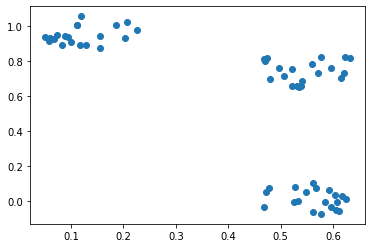

In [17]:
D = generate_data()
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:,1] )
plt.show()

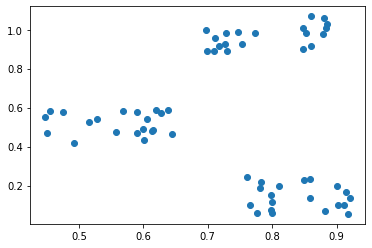

I have generated 49 many neurons.
id of BMU=11


In [5]:
from som import som

import numpy as np

def generate_data(nr_clusters=3, nr_samples_per_cluster=20):

    centroids = np.random.uniform(low=0.0, high=1.0, size=(nr_clusters, 2))

    data = np.zeros( (nr_clusters*nr_samples_per_cluster, 2) )

    i = 0
    for centroid in centroids:
        for sample_nr in range(nr_samples_per_cluster):
            offset_vec =np.random.uniform(low=-0.1, high=+0.1, size=2)
            data_point = centroid + offset_vec
            data[i] = data_point
            i+=1

    return data

# 1. Generate training data for the SOM
D = generate_data()

# 2. Show the training data
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:,1] )
plt.show()

# 3. Generate a SOM
my_som = som(input_dim=2, map_side_len=7)

# 4. Train the SOM
NR_TRAIN_STEPS = 1
NR_DATA_POINTS = D.shape[0]

for train_step in range(NR_TRAIN_STEPS):
    rnd_data_point_index = np.random.randint(low=0, high=NR_DATA_POINTS)
    data_point = D[rnd_data_point_index]

    # adapt SOM to current train data point
    my_som.adapt( data_point )